In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import warnings
# filter some warning messages
warnings.filterwarnings("ignore") 
####################you will need to change some paths here!#####################
#list of input files
#list of input files


In [11]:
df = pd.read_excel('./../data/sst_error.xlsx')
ds = df.to_xarray().rename({'SST':'sst'})
ds = ds.swap_dims({'index':'sst'}).drop('index')
ds

<xarray.Dataset>
Dimensions:     (sst: 36)
Coordinates:
  * sst         (sst) int64 -1 0 1 2 3 4 5 6 7 8 ... 26 27 28 29 30 31 32 33 34
Data variables:
    std_7GHz    (sst) float64 0.28 0.26 0.25 0.24 0.23 ... 0.15 0.15 0.15 0.15
    std_11GHz   (sst) float64 0.96 0.75 0.61 0.53 0.46 ... 0.16 0.16 0.16 0.16
    bias_7GHz   (sst) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    bias_11GHz  (sst) float64 0.13 0.09 0.05 0.04 0.03 ... 0.0 0.0 0.0 0.0 0.0

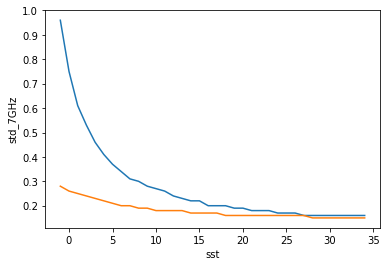

In [13]:
ds.std_11GHz.plot()
ds.std_7GHz.plot()

In [ ]:
from dask_gateway import Gateway
from dask.distributed import Client
gateway = Gateway()
cluster = gateway.new_cluster()
cluster.adapt(minimum=1, maximum=20)
client = Client(cluster)
cluster

In [ ]:
%%time
file_location = 's3://mur-sst/zarr'
ds_sst = xr.open_zarr(fsspec.get_mapper(file_location, anon=True),consolidated=True)
ds_sst

In [ ]:
sst_climatology = sst_timeseries.groupby('time.month').mean()
sst_climatology_yr = sst_timeseries.mean({'time'})

In [ ]:
map7 = ds.std_7GHz.interp(lat=ds_sst.lat,lon=ds_sst.lon)
map11 = ds.std_11GHz.interp(lat=ds_sst.lat,lon=ds_sst.lon)
mapd = map11 - map7